In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from numpngw import write_apng
from IPython.display import Image
from pendulum import *

  0%|          | 0/100 [00:00<?, ?it/s]

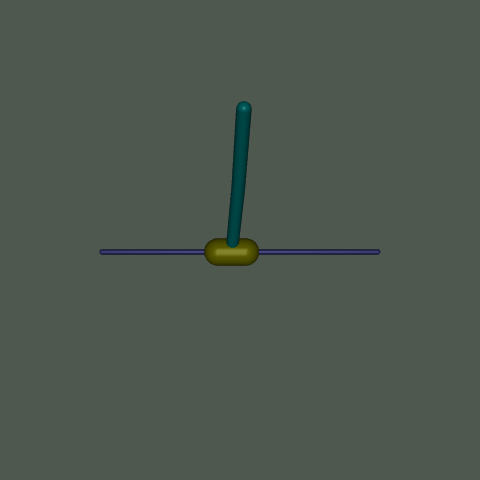

In [3]:
env = gym.make('InvertedDoublePendulum-v4', render_mode='rgb_array')
env.reset()

frames = []  # frames to create animated png
frames.append(env.render())
for i in tqdm(range(100)):
    action = env.action_space.sample()
    s = env.step(action)
    img = env.render()
    frames.append(img)

write_apng("cartpole_example.png", frames, delay=10)
Image(filename="cartpole_example.png")


In [ ]:
## Let's test to see if your analytic dynamics matches the simulator

# first let's generate a random control sequence
T = 50
control_sequence = np.random.randn(T, 1)
#start_state = np.array([1, 0.25, 0, 0])

# We use the simulator to simulate a trajectory
env = gym.make('InvertedDoublePendulum-v4', render_mode='rgb_array')
start_state = env.reset()
#env.reset(start_state)

states_mujoco = np.zeros((T+1, 8))
states_mujoco[0] = start_state

for t in range(T):
    states_mujoco[t+1] = env.step(control_sequence[t])

# Now we will use your analytic dynamics to simulate a trajectory
# Need an extra 1 which is the batch dimension (T x B x 4)
states_analytic = np.zeros(T+1, 1, 6)
states_analytic[0] = change_of_coords(start_state) # torch.from_numpy(start_state).reshape(1, 4)
for t in range(T):
    #current_state = states_analytic[t]
    #current_control = #torch.from_numpy(control_sequence[t]).reshape(1, 1)  # add batch dimension to control
    states_analytic[t +1] = dynamics_analytic(states_analytic[t], control_sequence[t])

# convert back to numpy for plotting
states_analytic = states_analytic.reshape(T+1, 6)

# Plot and compare - They should be indistinguishable
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes[0][0].plot(states_analytic[:, 0], label='analytic')
axes[0][0].plot(states_mujoco[:, 0], '--', label='pybullet')

axes[0][0].title.set_text('x')
axes[0][1].plot(states_analytic[:, 1])
axes[0][1].plot(states_mujoco[:, 1], '--')

axes[0][1].title.set_text('theta')
axes[1][0].plot(states_analytic[:, 2])
axes[1][0].plot(states_mujoco[:, 2], '--')

axes[1][0].title.set_text('x_dot')
axes[1][1].plot(states_analytic[:, 3])
axes[1][1].plot(states_mujoco[:, 3], '--')

axes[1][1].title.set_text('theta_dot')
axes[0][0].legend()
plt.show()
